# MAC0460 / MAC5832 (2020)
<hr>

## EP4: Logistic regression

### Topics / concepts explored in this EP:

- Implementation of the **logistic regression algorithm**, using the gradient descent technique
- Application on binary classification of images, using their feature representation
- Confusion matrix, effects of unbalanced classes

Complete and submit this notebook. **PLEASE do no change the file name.**

### Evaluation  
- Correctitude of the algorithms
- Code
    - do not change the prototype of the functions
    - efficiency (you should avoid unnecessary loops; use matrix/vector computation with NumPy wherever appropriate)
    - cleanliness (do not leave any commented code or useless variables)
- Appropriateness of the answers
- File format: Complete and submit this notebook <font color="red">with the outputs of the execution</font>. **Do no change the file name.**
<hr>

### Hints
- It might be wise to first make sure your implementation is correct. For instance, you can compare the results of your implementation and of the one implemented in <a href="https://scikit-learn.org/stable/">scikit-learn</a>. After you feel confident, paste your code in the notebook, and then run the rest of the code in the notebook.
- If you face difficulties with Keras or other libraries used in this notebook, as well as clarity issues in the exercises in this notebook, post a message in the <a href="https://edisciplinas.usp.br/mod/forum/view.php?id=2785513">Forum for discussions</a>.

# 1. Logistic regression 

Here we use the formulation described in the book [2].

The cost function to be minimized is
$$
E_{in}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \ln(1 + e^{-y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}) \tag{1}
$$

Its gradient is given by

$$\nabla E_{in}(\mathbf{w}) = - \frac{1}{N}\sum_{i=1}^{N} \frac{y^{(i)} \mathbf{x}^{(i)}}{1 + e^{y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}}  \tag{2}$$

The logistic (sigmoid) function is
$$\sigma(z) = \frac{1}{1 + e^{-z}}  \tag{3}$$

### <font style="background-color: #000000	;">Exercise 1</font>
<font style="background-color: #000000;">In the next three code cells, write the code to implement four functions that will be used below for logistic regression training and prediction. Use vectorial computation with NumPy.</font>

### Cross-entropy loss and cross-entropy gradient
The two functions in the following cell should implement, respectively, equations (1) and (2) above. 

In [2]:
import numpy as np

def cross_entropy(w, X, y):
    """
    Computes the loss (equation 1)
    :param w: weight vector
    :type: np.ndarray(shape=(1+d, 1))
    :param X: design matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: class labels
    :type y: np.ndarray(shape=(N, 1))
    :return loss: loss (equation 1)
    :rtype: float
    """    
    ### Your code begins here _____________________
    N = X.shape[0]
    
    loss = np.divide(np.sum(np.log(1.0 + np.exp(-np.dot(y,np.dot(w.T, X.T).T)))),N)
    
    ### Your code ends here _____________________
    return loss

def cross_entropy_gradient(w, X, y):
    """
    Computes the gradient of the loss function (equation 2)
    :param w: weight vector
    :type: np.ndarray(shape=(1+d, 1))
    :param X: design matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: class labels
    :type y: np.ndarray(shape=(N, 1))
    :return grad: gradient (equation 2)
    :rtype: float
    """    
    ### Your code begins here _____________________
    N = X.shape[0]
    
    gradient = np.divide(np.sum(np.divide(np.dot(y.T,X),(1.0 + np.exp(np.dot(y,np.dot(w.T, X.T).T))))),-N)
    ### Your code ends here _____________________
    return gradient

### Logistic regression training

The function below receives the data matrix <tt>X (shape = (N, d))</tt> and the ouput vector <tt>y (shape = (N,))</tt>, and should return the final weight vector <tt>w</tt> and, optionally (when 
parameter <tt>return_history = True</tt>), a list of size <tt>num_iterations+1</tt> with the cross-entropy loss values at the beginning and after each of the iterations.

Note that the data matrix needs to be extended with a column of 1's.

In [1]:
def train_logistic(X, y, learning_rate = 1e-1, w0 = None,\
                        num_iterations = 1000, return_history = False):
    """
    Computes the weight vector applying the gradient descent technique
    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: class label
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(1+d, 1))
    :return: the history of loss values (optional)
    :rtype: list of float
    """    
    
    ### Your code begins here _____________________
    
    cost_history = []
    
    #Add column of 1s to beginning of X
    ones = np.zeros((X.shape[0],1)) + 1
    Xe = np.append(ones, X, axis = 1)

    #Initialize weights independently from a normal distribution with zero mean
    #and small variance
    mu, sigma = 0, 0.01 # mean and standard deviation
    w_current = np.array([np.random.normal(mu, sigma, 3)]).T

    #Calculate cost before starting iterations
    cost_history.append(cross_entropy(w_current, Xe, y))
    
    for t in range(0, num_iterations):
        #compute the gradient
        gradient = cross_entropy_gradient(w_current, Xe, y)
        
        #𝐰(𝑡+1) = 𝐰(𝑡) − 𝜂v(𝑡)
        #Update weights
        w_current = w_current - learning_rate*gradient
        
        #Calculate cost at the end of each iteration
        cost_history.append(cross_entropy(w_current, Xe, y))
    
    ### Your code ends here _____________________
    return w_current, cost_history

### Logistic regression prediction
The function in the next cell will be used to do the prediction of logistic regression. Recall that the prediction is a score in $[0,1]$, given by the sigmoid value of the linear combination.

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict_logistic(X, w):
    """
    Computes the logistic regression prediction
    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :rtype: np.ndarray(shape=(1+d, 1))
    :return: predicted classes 
    :rtype: np.ndarray(shape=(N, ))
    """    
    ### Your code begins here _____________________
    #Add column of 1s to beginning of X
    ones = np.zeros((X.shape[0],1)) + 1
    X = np.append(ones, X, axis = 1)
        
    # h(x(i);w) = sigmoid(W^Tx)    
    prediction = sigmoid(np.dot(w.T, X.T))
    
    ### Your code ends here _____________________
    return prediction


# 2. MNIST Dataset #

This is a well known dataset, commonly used as a first example of image classification tasks. We could say it is the "Hello world!" of image classification. It consists of handwritten digits, divided into $60000$ training images and $10000$ test images. All images are gray-scale (one channel with pixel intensities varying from 0 to 255) and have size $28 \times 28$. There are 10 classes, corresponding to digits 0 to 9.

The dataset is available in many places. Here we will use the one available   with Keras [1]. 
More information on MNIST can be found at the [oficial site](http://yann.lecun.com/exdb/mnist/).

[1]: François Chollet and others, Keras, https://keras.io, 2015

In [4]:
from tensorflow.keras.datasets import mnist

(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

print(X_train_all.shape, y_train_all.shape)
print(X_test_all.shape, y_test_all.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Class distribution of MNIST (training set)


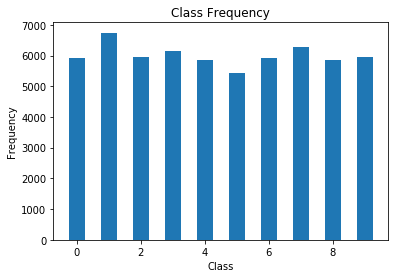

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

unique, counts = np.unique(y_train_all, return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### <font style="background-color: #000000;">Exercise 2</font>
<font style="background-color: #000000;">Repeat **Class distribution of MNIST** for the testing set (next cell) and compare and comment about the distributions of the training and of the testing sets. Do you think this type of comparison is important? Comment.</font>

###It's important that the distribution of the training and test data be similar so that our model doesn't overfit to a sample that doesn't realistically represent the whole data set. Different distributions among the two would make generalizing more difficult, giving us a large generalization error.

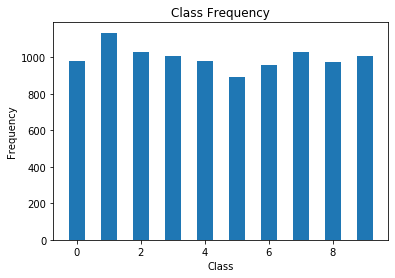

In [6]:
# Your code here ___________________
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

unique, counts = np.unique(y_test_all, return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


### Visualization of some of the examples

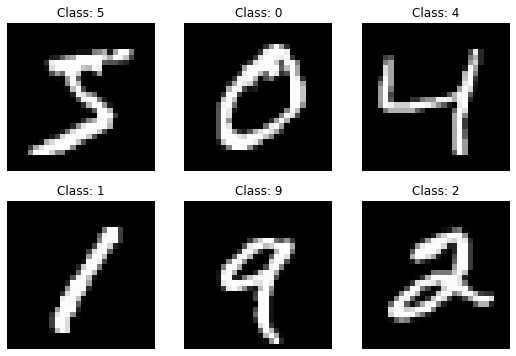

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ax[i//3, i%3].imshow(X_train_all[i], cmap='gray')
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_all[i])
    
plt.show()

# 3. Feature extraction

Note that the images consist of 28×28=784 pixel values and they could be used as "raw features" of the images. However, here we will extract some features from the images and perform classification using them instead of the pixel values.

### Mean intensity

In the book _Learning from Data_ [2], one of the attributes (features) used by the authors is the mean intensity of pixel values. This feature is directly related to the proportion of the pixels corresponding to the digit in the image. For instance, it is reasonable to expect that a digit 5 or 2 occupies more pixels than the digit 1 and, therefore, the mean intensity of the first two should be larger than that of the digit 1.

### Symmetry

The second attribute used by the authors is horizontal symmetry.

Symmetry will be defined in terms of asymetry. We define asymmetry as the pixelwise mean of the absolute difference between the pixels values from the original image and those from the corresponding horizotally flipped image. Then, symmetry is defined as the negative of asymmetry.

[2]: Yaser S Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin, Learning from Data, 2012

In [8]:
import numpy as np

def mean_intensity(image):
    return np.mean(image)

def Hsimmetry(image):
    # The processing below invert the order of the columns of the image
    reflected_image = image[:, ::-1]
    return -np.mean(np.abs(image - reflected_image))

## Pixels $\rightarrow$ Features ##

The above functions for feature extraction will be applied to the samples, both on the training and the test sets. After the feature extraction process below, each image will be represented by two features.

### <font style="background-color: #000000;">Exercise 3</font>

<font style="background-color: #000000;">Fill in the appropriate places in the two code cells below as indicated, to print the mean value of each feature in the training and test sets. Compare the mean values on training and test sets after normalization and comment on them.</font>


###Before normalization, the training and test set, for each feature, have virtually the same mean value. After applying the z-score normalization for the training data, which should set the mean to zero, we can see that the average feature value for the training data set is extremely small (virtually zero). But, since the normalization is calculate on only the training data, once it is applied on the test data set, the mean value are not as small as for the training data.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat

# Function that converts an image into a list of features,
# using the feature computation functions defined above
def convert2features(image):
    return np.array([mean_intensity(image),
                     Hsimmetry(image)])

# feature names
F = ['Mean intensity', 'Hsymmetry']

# Generate the feature representation for all images
X_train_features = np.array([convert2features(image) for image in X_train_all])
X_test_features  = np.array([convert2features(image) for image in X_test_all])

print(X_train_features.shape)
print(X_test_features.shape)

# print the mean value of each of the features
### Your code here __________________________
print("X Train",F[0], stat.mean(X_train_features[:,0]))
print("X Test",F[0], stat.mean(X_test_features[:,0]))
print("X Train Mean",F[1], stat.mean(X_train_features[:,1]))
print("X Test Mean",F[1], stat.mean(X_test_features[:,1]))

(60000, 2)
(10000, 2)
X Train Mean intensity 33.318421449829934
X Test Mean intensity 33.791224489795916
X Train Mean Hsymmetry -32.61779591836735
X Test Mean Hsymmetry -32.45322448979592


**Normalization** of feature values is a common procedure. Here we apply the z-score formula. Note that the normalization parameters (mean and standard deviation) are computed only on training data. To normalize the test data, we use the same parameters.
(We suggest you to think why we should not compute the mean and standard deviation over the training+test set. There is no need to answer this here.)

In [10]:
import statistics as stat

# Adjust the scale of feature values; standardize them.
# (Yes, the features in the test set should be standardized using
#  the statistics of the features in the training set) -- why ??
for i in range(X_train_features.shape[1]):
    avg = np.mean(X_train_features[:, i])
    stddev = np.std(X_train_features[:, i])
    X_train_features[:, i] = (X_train_features[:, i] - avg) / stddev
    X_test_features[:, i] = (X_test_features[:, i] - avg) / stddev

print(X_train_features.shape)
print(X_test_features.shape)

# print the mean value of each of the features
print("\nTraining set, after normalization:")
### Your code here __________________________
print("X Train",F[0], stat.mean(X_train_features[:,0]))
print("X Train Mean",F[1], stat.mean(X_train_features[:,1]))

print("\nTesting set, after normalization:")
### Your code here __________________________
print("X Test",F[0], stat.mean(X_test_features[:,0]))
print("X Test Mean",F[1], stat.mean(X_test_features[:,1]))


(60000, 2)
(10000, 2)

Training set, after normalization:
X Train Mean intensity -1.8584375574906553e-16
X Train Mean Hsymmetry -5.771510584266318e-16

Testing set, after normalization:
X Test Mean intensity 0.042822033789169524
X Test Mean Hsymmetry 0.020592222216913605


# 4. Logistic regression training and testing

## 4.1 Select a subset from two of the classes

Here we select two classes as well as a subset of the examples in each class. All code from here on will use the selected subset. You may change later the selected classes and the number of samples in each class.

### Select two classes

In [114]:
import numpy as np

P = 5  # positive class
N = 1  # negative class

X_train_P = X_train_features[y_train_all == P]
X_train_N = X_train_features[y_train_all == N]
y_train_P = y_train_all[y_train_all == P]
y_train_N = y_train_all[y_train_all == N]

X_test_P = X_test_features[y_test_all == P]
X_test_N = X_test_features[y_test_all == N]
y_test_P = y_test_all[y_test_all == P]
y_test_N = y_test_all[y_test_all == N]

print("Positive class: ", X_train_P.shape, y_train_P.shape)
print("Negative class: ", X_train_N.shape, y_train_N.shape)

Positive class:  (5421, 2) (5421,)
Negative class:  (6742, 2) (6742,)


### Select a subset of examples from each of the two classes

### <font style="background-color: #000000;">Exercise 4</font>
<font style="background-color: #000000;">In the following cell, write the code to change the label of the positive class to +1 and of the negative class to -1. </font>

In [88]:
# Number of positives and negatives to be effectively considered
# in the training data to be explored in the remainder of this notebook
nP = 1000
nN = 1000

X_train = np.concatenate([X_train_P[:nP], X_train_N[:nN]], axis = 0)
y_train = np.concatenate([y_train_P[:nP], y_train_N[:nN]], axis = 0).astype('float32')

X_test = np.concatenate([X_test_P, X_test_N], axis = 0)
y_test = np.concatenate([y_test_P, y_test_N], axis = 0).astype('float32')


# Change positive class label to +1 and negative class label to -1
### Your code begins here _____________________
y_train[y_train == P], y_train[y_train == N] = 11,12 #troca para numeros fora do intervalo 0-9
y_train[y_train == 11], y_train[y_train == 12] = 1,-1
### Your code ends here _____________________
y_test[y_test == P], y_test[y_test == N] = 11,12 #troca para numeros fora do intervalo 0-9
y_test[y_test == 11], y_test[y_test == 12] = 1,-1

# Shuffle
np.random.seed(56789)
def shuffle(X, y):
    # input and output must be shuffled equally
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2000, 2) (2000,)
(2109, 2) (2109,)


### Plot the selected data

Let us plot the selected subset of data. Negative examples will be plotted in red and positive ones in blue.

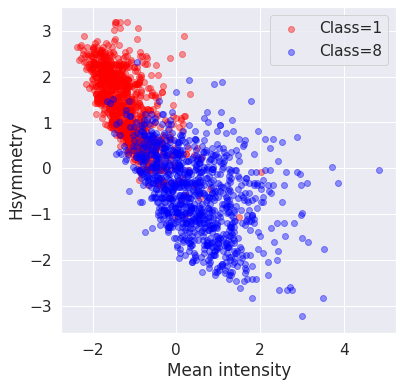

In [89]:
def plot_features(ax,X,y):
    # negatives in red
    ax.scatter(X[y==-1,0], \
               X[y==-1,1], \
               label='Class=%d'%N, c = 'red', alpha = 0.4)

    # and positives in blue
    ax.scatter(x=X[y==1,0], \
               y=X[y==1,1], \
               label='Class=%d'%P, c = 'blue', alpha = 0.4)

    ax.set_xlabel(F[0])
    ax.set_ylabel(F[1])
    ax.legend(loc='best')
    
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plot_features(ax,X_train,y_train)
plt.show()      


## 4.2 Training

### <font style="background-color: #000000;">Exercise 5</font>
<font style="background-color: #000000;">Run the code in the following cell a few times, each time with different values for  the learning rate and the number of iterations. Comment the behavior of the loss curve. Which values do you consider as good choices?

**Note:** for your submission, keep the execution output corresponding to the best parameter values you have found.</font>
 
###For this exercise, I observed that, while maintaining the number of iterations constant, a smaller learning rate resulted in a larger final loss than a large learning rate (but with a large learning rate the cross entropy drops very quickly in the first couple of iterations). Maintaining the learning rate constant, I also observed that a larger number of iterations produced a smaller final loss than fewer iterations. If the number of iterations is too small, the local minumum isn't reached. Although, the larger the number of iterations, the longer was the runtime. Therefore, it seems to be ideal to keep a balance between the number of iterations and the learning rate.


Final weight:
 [[ 0.00655245]
 [ 0.00811875]
 [-0.00562423]]
Final loss:
 2.2730817227961228e-14


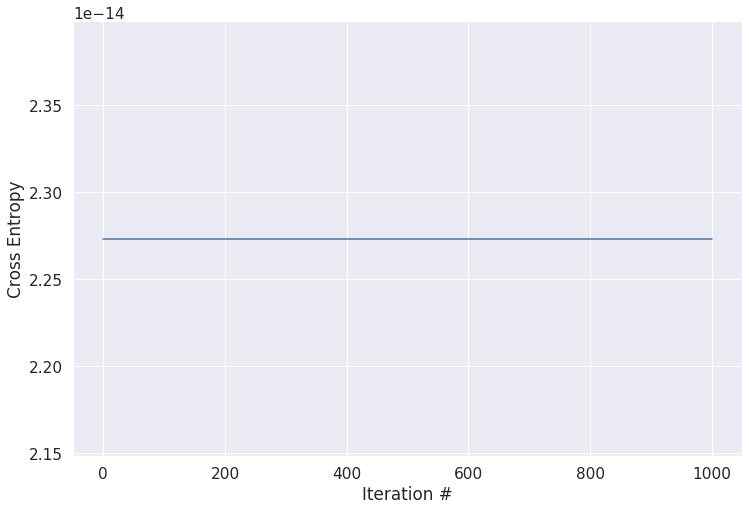

In [90]:

np.random.seed(56789)
w_logistic, loss = train_logistic(X_train, y_train,\
                                       learning_rate = 0.05,
                                       num_iterations = 1000,\
                                       return_history = True)

print("Final weight:\n", w_logistic)
print("Final loss:\n", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy')
plt.show()

### Ploting the scores and decision boundary

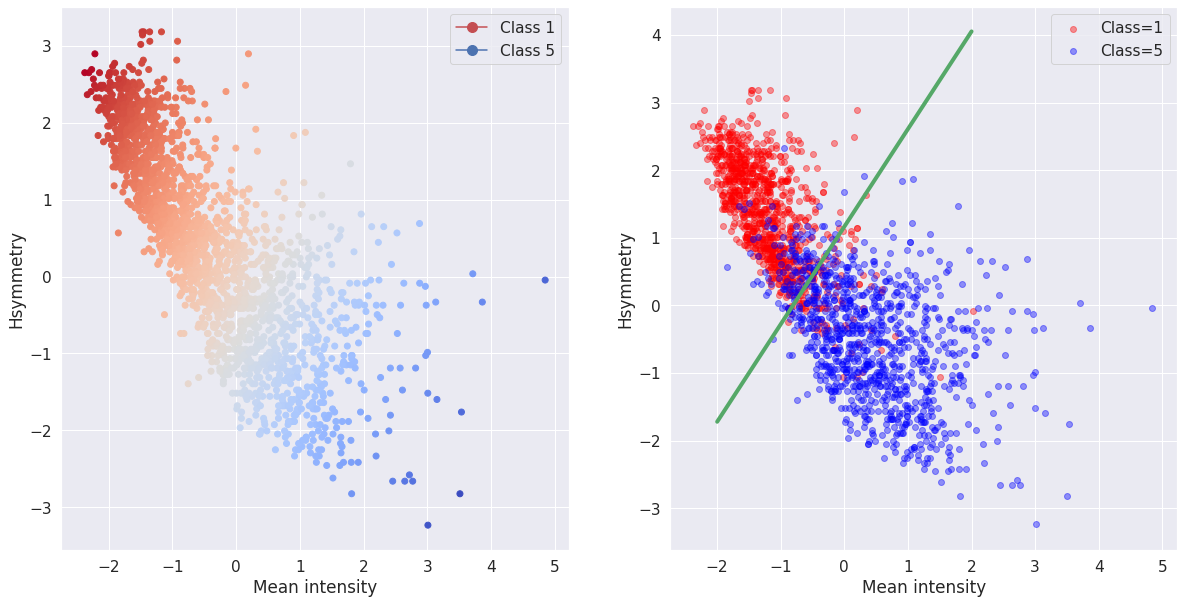

In [121]:
from matplotlib.lines import Line2D

y_pred = predict_logistic(X_train, w_logistic)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

ax1.scatter(x = X_train[:,0], y = X_train[:,1],\
            c = -y_pred[0], cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10)]
ax1.set_xlabel(F[0])
ax1.set_ylabel(F[1])
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
plot_features(ax2,X_train,y_train)

p1 = (-2, -(w_logistic[0] - 2*w_logistic[1])/w_logistic[2])
p2 = (2,  -(w_logistic[0] + 2*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()
        


### Confusion matrix

Recall that the logistic regression returns a score $\hat{p}$ in $[0,1]$, which can be interpreted as the probability $p(y=1|\mathbf{x})$. To compute the confusion matrix, one needs to choose a threshold value $T$ to decide the final class label (that is  $\hat{y} = 1 \Longleftrightarrow \hat{p} \geq T$ ).

In [122]:
import seaborn as sn
import pandas as pd

def plot_confusion_matrix(y, y_pred):
    """
    It receives an array with the ground-truth (y)
    and another with the prediction (y_pred), both with binary labels
    (positve=+1 and negative=-1) and plots the confusion
    matrix.
    It uses P (positive class id) and N (negative class id)
    which are "global" variables ...
    """
    TP = np.sum((y_pred == 1) * (y == 1))
    TN = np.sum((y_pred == -1) * (y == -1))

    FP = np.sum((y_pred == 1) * (y == -1))
    FN = np.sum((y_pred == -1) * (y == 1))

    total = TP+FP+TN+FN
    print("TP = %4d    FP = %4d\nFN = %4d    TN = %4d"%(TP,FP,FN,TN))
    print("Accuracy = %d / %d (%f)\n" %((TP+TN),total, (TP+TN)/total))
    confusion = [
        [TP/(TP+FN), FP/(TN+FP)],
        [FN/(TP+FN), TN/(TN+FP)]
    ]

    df_cm = pd.DataFrame(confusion, \
                         ['$\hat{y} = %d$'%P, '$\hat{y} = %d$'%N],\
                         ['$y = %d$'%P, '$y = %d$'%N])
    plt.figure(figsize = (8,4))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True)
    plt.show()
    

### <font style="background-color: #000000;">Exercise 6</font>
<font style="background-color: #000000;">Play with the threshold value in the code (following cell). Did you manage to find a threshold value (other than 0.5) that improves accuracy? How threshold relates to TP, FP, TN and FN ? Comment.</font>

###Below 0.43 we get all true positives and all false positives, meaning both numbers are being classified as the same (in this case 5). Above 0.52 we get all false negatives and true negatives, meaning both numbers are being classified as 1. The optimal threshold I found is at 0.465, at which the accuracy is 0.67.

TP =  882    FP =  103
FN =  118    TN =  897
Accuracy = 1779 / 2000 (0.889500)



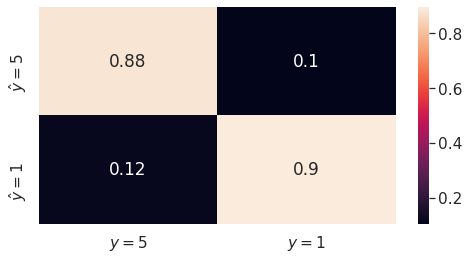

In [123]:
    import seaborn as sn
    import pandas as pd

    threshold = 0.5

    p_hat = predict_logistic(X_train, w_logistic)
    y_hat = np.where(p_hat >= threshold, 1, -1)

    total = len(y_hat)

    plot_confusion_matrix(y_train, y_hat)

## 4.3 Testing

### <font style="background-color: #000000;">Exercise 7</font>
<font style="background-color: #000000;">Repeat score and boundary ploting, as well as confusion matrix ploting with respect to test set. Comment what you observed.</font>

###For the test data, below 0.38 we get all true positives and all false positives, meaning both numbers are being classified as 5. Above 0.53 we get all false negatives and true negatives, meaning both numbers are being classified as 1. The optimal threshold I found is at 0.48 (a value close to the optimal threshold for classifying the training data), at which the accuracy is 0.73 (even better than for the training data, possibly because the test data set is nearly 10x larger than the training data set).

[[0.49710704 0.49850216 0.4971206  ... 0.50315838 0.50204768 0.50039346]]


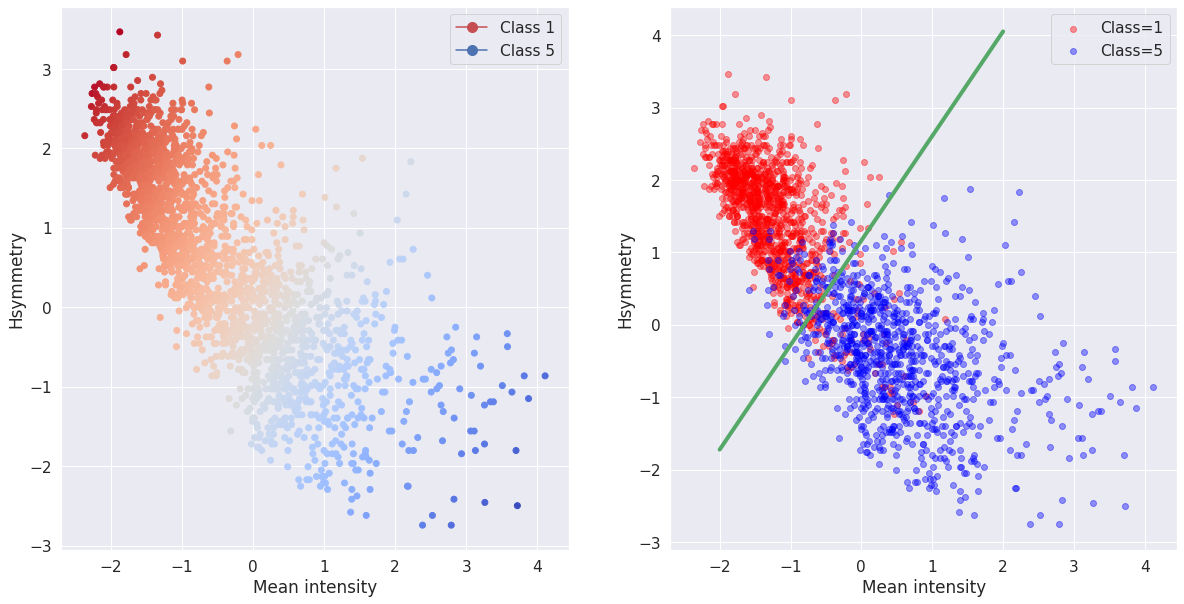

In [124]:
### Your code for score and boundary plotting (for the test set)

from matplotlib.lines import Line2D

y_pred = predict_logistic(X_test, w_logistic)
print(y_pred)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

ax1.scatter(x = X_test[:,0], y = X_test[:,1],\
            c = -y_pred[0], cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10)]
ax1.set_xlabel(F[0])
ax1.set_ylabel(F[1])
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
plot_features(ax2,X_test,y_test)

p1 = (-2, -(w_logistic[0] - 2*w_logistic[1])/w_logistic[2])
p2 = (2,  -(w_logistic[0] + 2*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()
        


TP =  890    FP =   81
FN =   84    TN = 1054
Accuracy = 1944 / 2109 (0.921764)



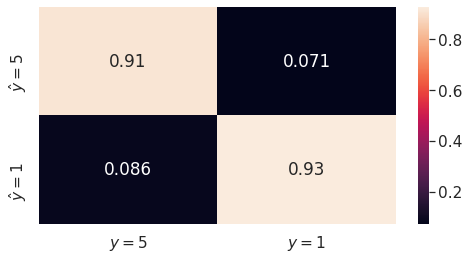

In [120]:
### Your code for confusion matrix plotting (for the test set)
import seaborn as sn
import pandas as pd

threshold = 0.5

p_hat = predict_logistic(X_test, w_logistic)
y_hat = np.where(p_hat >= threshold, 1, -1)

total = len(y_hat)

plot_confusion_matrix(y_test, y_hat)

### <font style="background-color: #000000;">Exercise 8</font>
<font style="background-color: #000000;">If you got to this point, make a copy of your notebook.
Run the <i>copy notebook</i> changing the number of positive and negative examples. Try an unbalanced training set and observe if there are any effects in the accuracy on the test set. Additionaly, you may try with a different pair of classes. Summarize HERE the experiments you did and comment whatever you found interesting. There is no need to submit the <i>copy notebook</i>.</font>

###Your comments here

[1]: François Chollet and others, Keras, https://keras.io, 2015

[2]: Yaser S Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin, _Learning from Data_, 2012